In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
# Import necessary libraries and packages
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

# Set dpi for figures
plt.rcParams['figure.dpi'] = 200

# **ACTIVITY 2.1: FAMILIARIZATION WITH THE DISCRETE FT**

## **Circle**

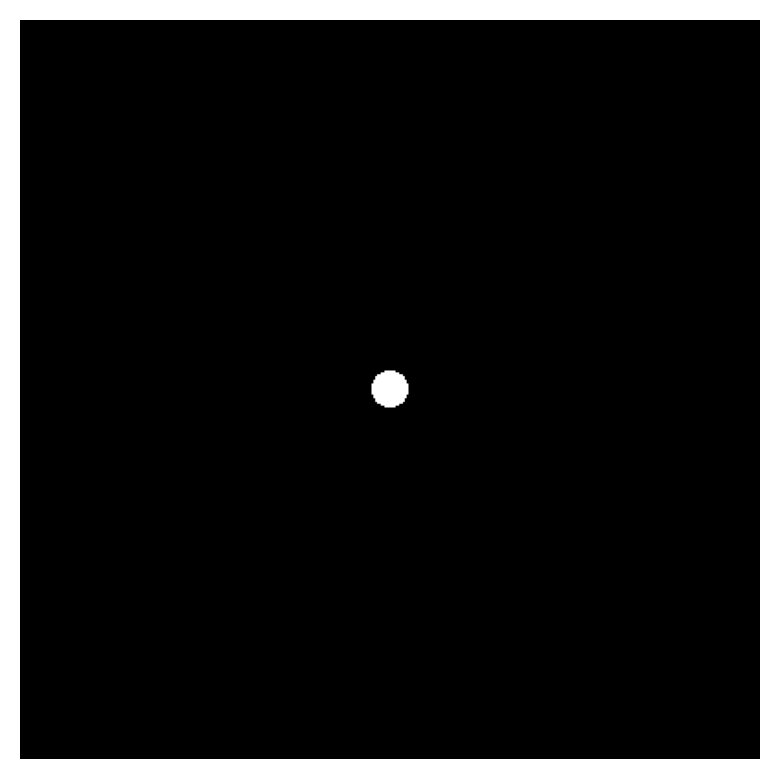

In [18]:
# Create a white circle against a black background
# This is basically the same process as in creating digital images in activity 1
N = 400                        # pixels (400x400)
x = np.linspace(-2,2,N)        # x values
y = x                          # y values
X,Y = np.meshgrid(x,y)         # create a grid of rectangular arrays
R = np.sqrt(X**2 + Y**2)       # circle equations
A1 = np.zeros(np.shape(R))     # initialize array for storing
A1[np.where(R<0.1)]=1.0        # if radius < 0.1, fill with 1.0 which corresponds to white in grayscale
plt.axis('off')                # everything else is just black

# Plot
plt.imshow(A1, cmap = 'gray')
plt.savefig("/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/orig_circle.png", dpi = 300, bbox_inches='tight', transparent = True)

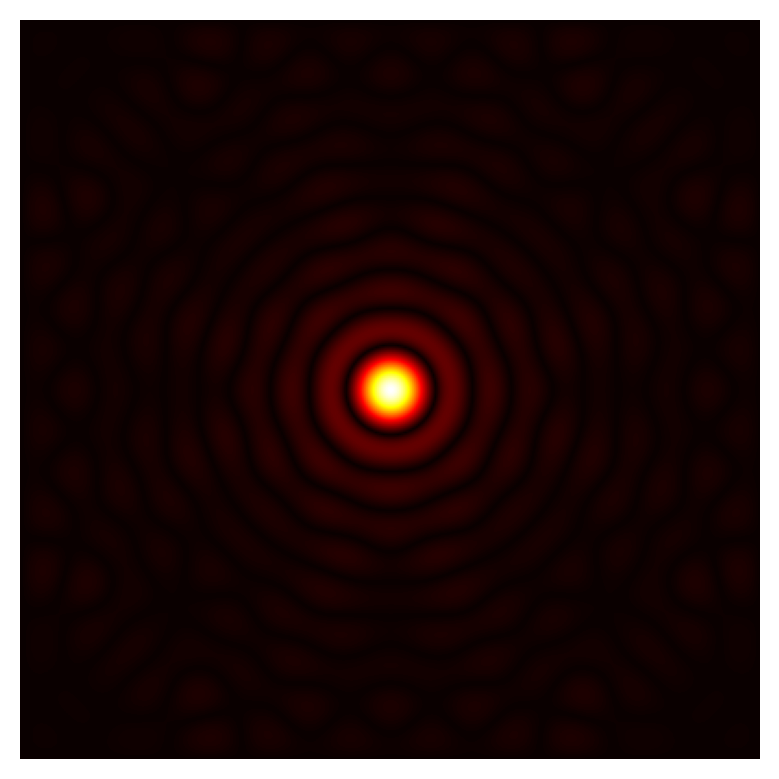

In [28]:
# Apply fft2 to the image then fftshift 
circft = np.fft.fft2(A1)
circft1 = np.fft.fftshift(circft)

# Plot the absolute value of the fftshifted image
plt.axis('off')
plt.imshow((abs(circft1)), cmap = 'hot')
plt.imsave('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/circleft.png', abs(circft1), cmap='hot')

## **What happens when we don't fftshift before plotting?**

(-0.5, 399.5, 399.5, -0.5)

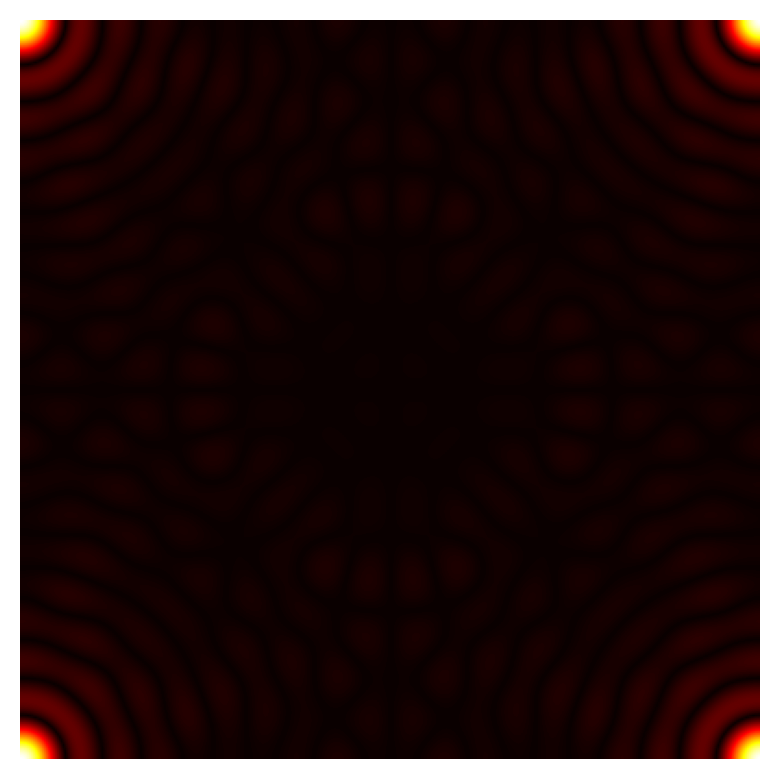

In [17]:
plt.imshow((abs(circft)), cmap = 'hot')
plt.axis('off')

**As we can see above, the resulting image has its intensities at the corners. By fftshifting first, we rearrange the FT by shifting the zero-frequency component (bright corners) to the center of the array.**

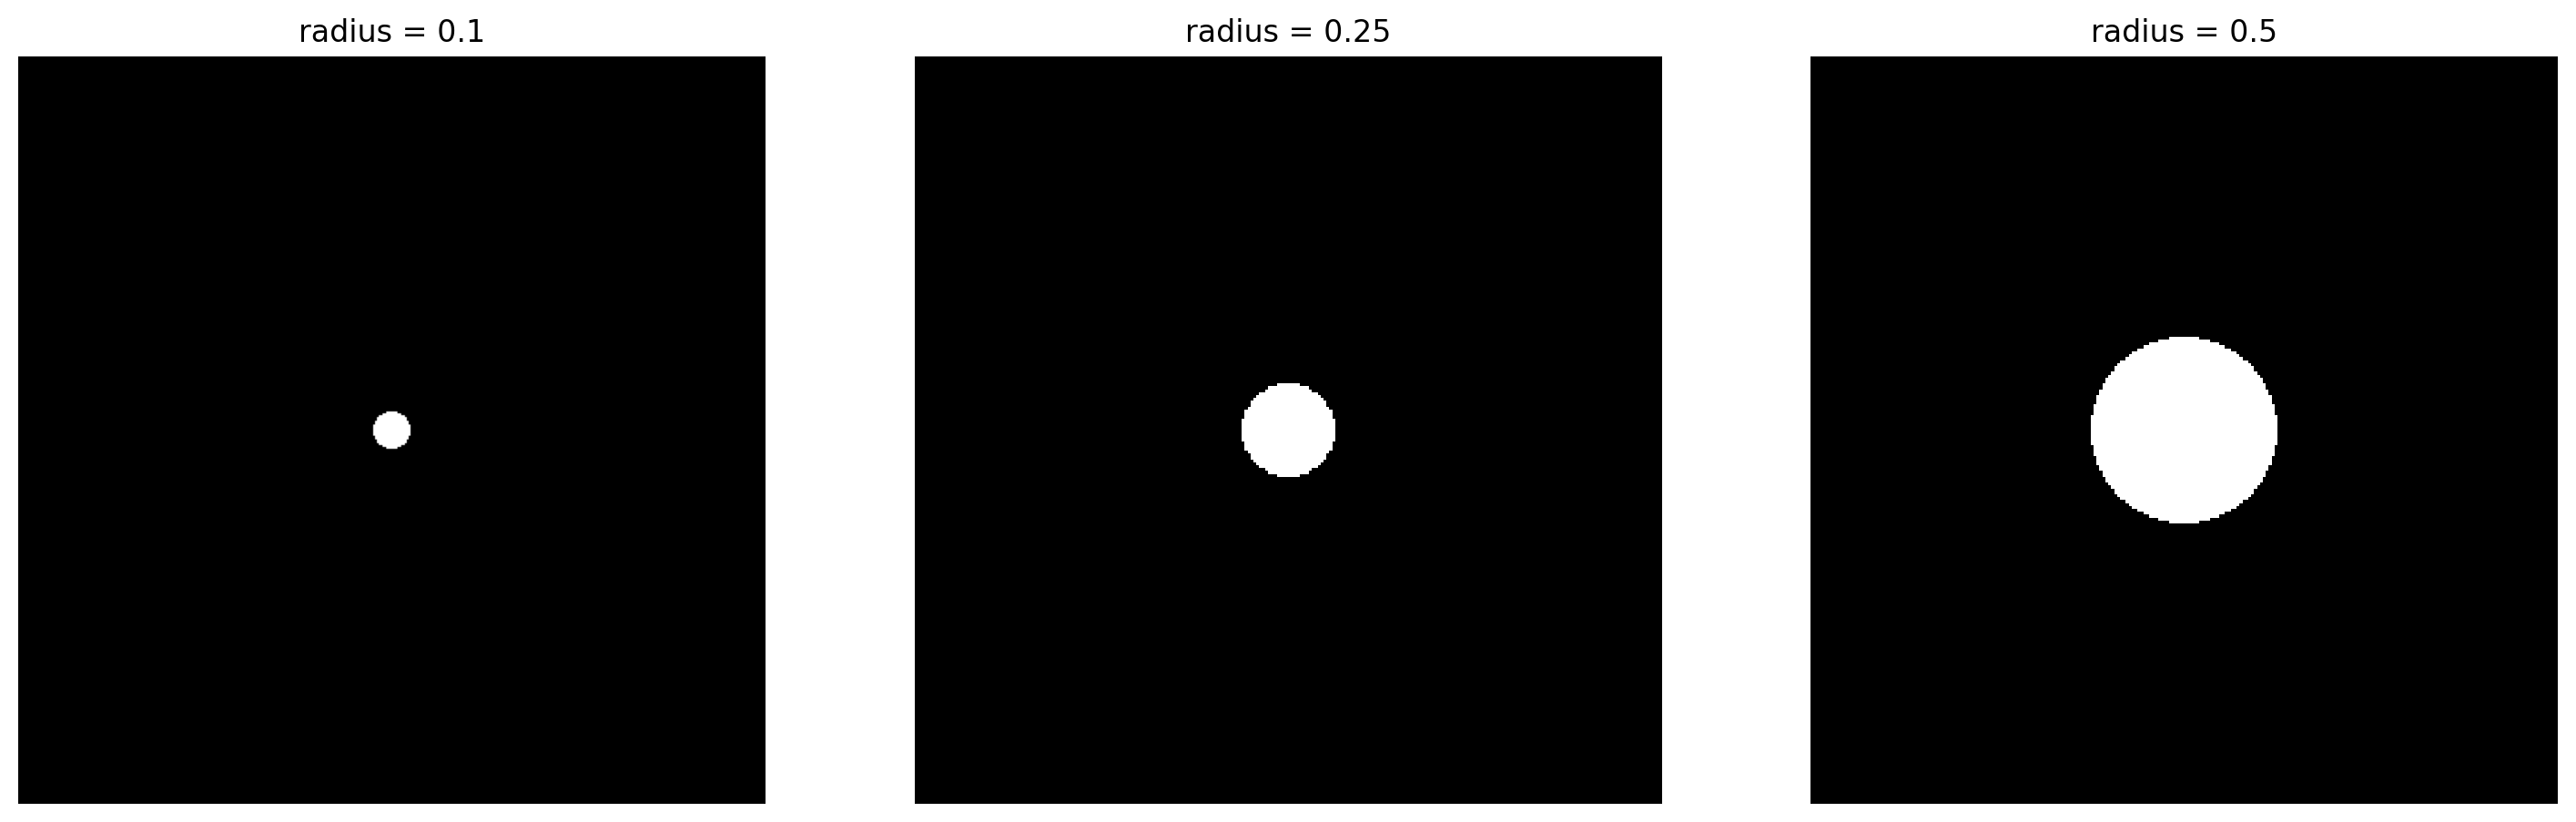

In [124]:
# For the next parts, we simulate how the FT behaves with increasing radius
# We reuse the same circle formula
# Constructing a circle with radius = 0.25
A2 = np.zeros(np.shape(R))
A2[np.where(R<0.25)]=1.0

# Constructing a circle with radius = 0.50
A3 = np.zeros(np.shape(R))
A3[np.where(R<0.5)]=1.0

# Plotting parameters
plt.figure(figsize = [18,6])

# 1st subplot for radius = 0.10
plt.subplot(131)
plt.title("radius = 0.1")
plt.axis('off')
plt.imshow(A1, cmap='gray')


# 2nd subplot for radius = 0.25
plt.subplot(132)
plt.title("radius = 0.25")
plt.axis('off')
plt.imshow(A2, cmap='gray')

# 3rd subplot for radius = 0.50
plt.subplot(133)
plt.title("radius = 0.5")
plt.axis('off')
plt.imshow(A3, cmap='gray')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/circles_orig.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

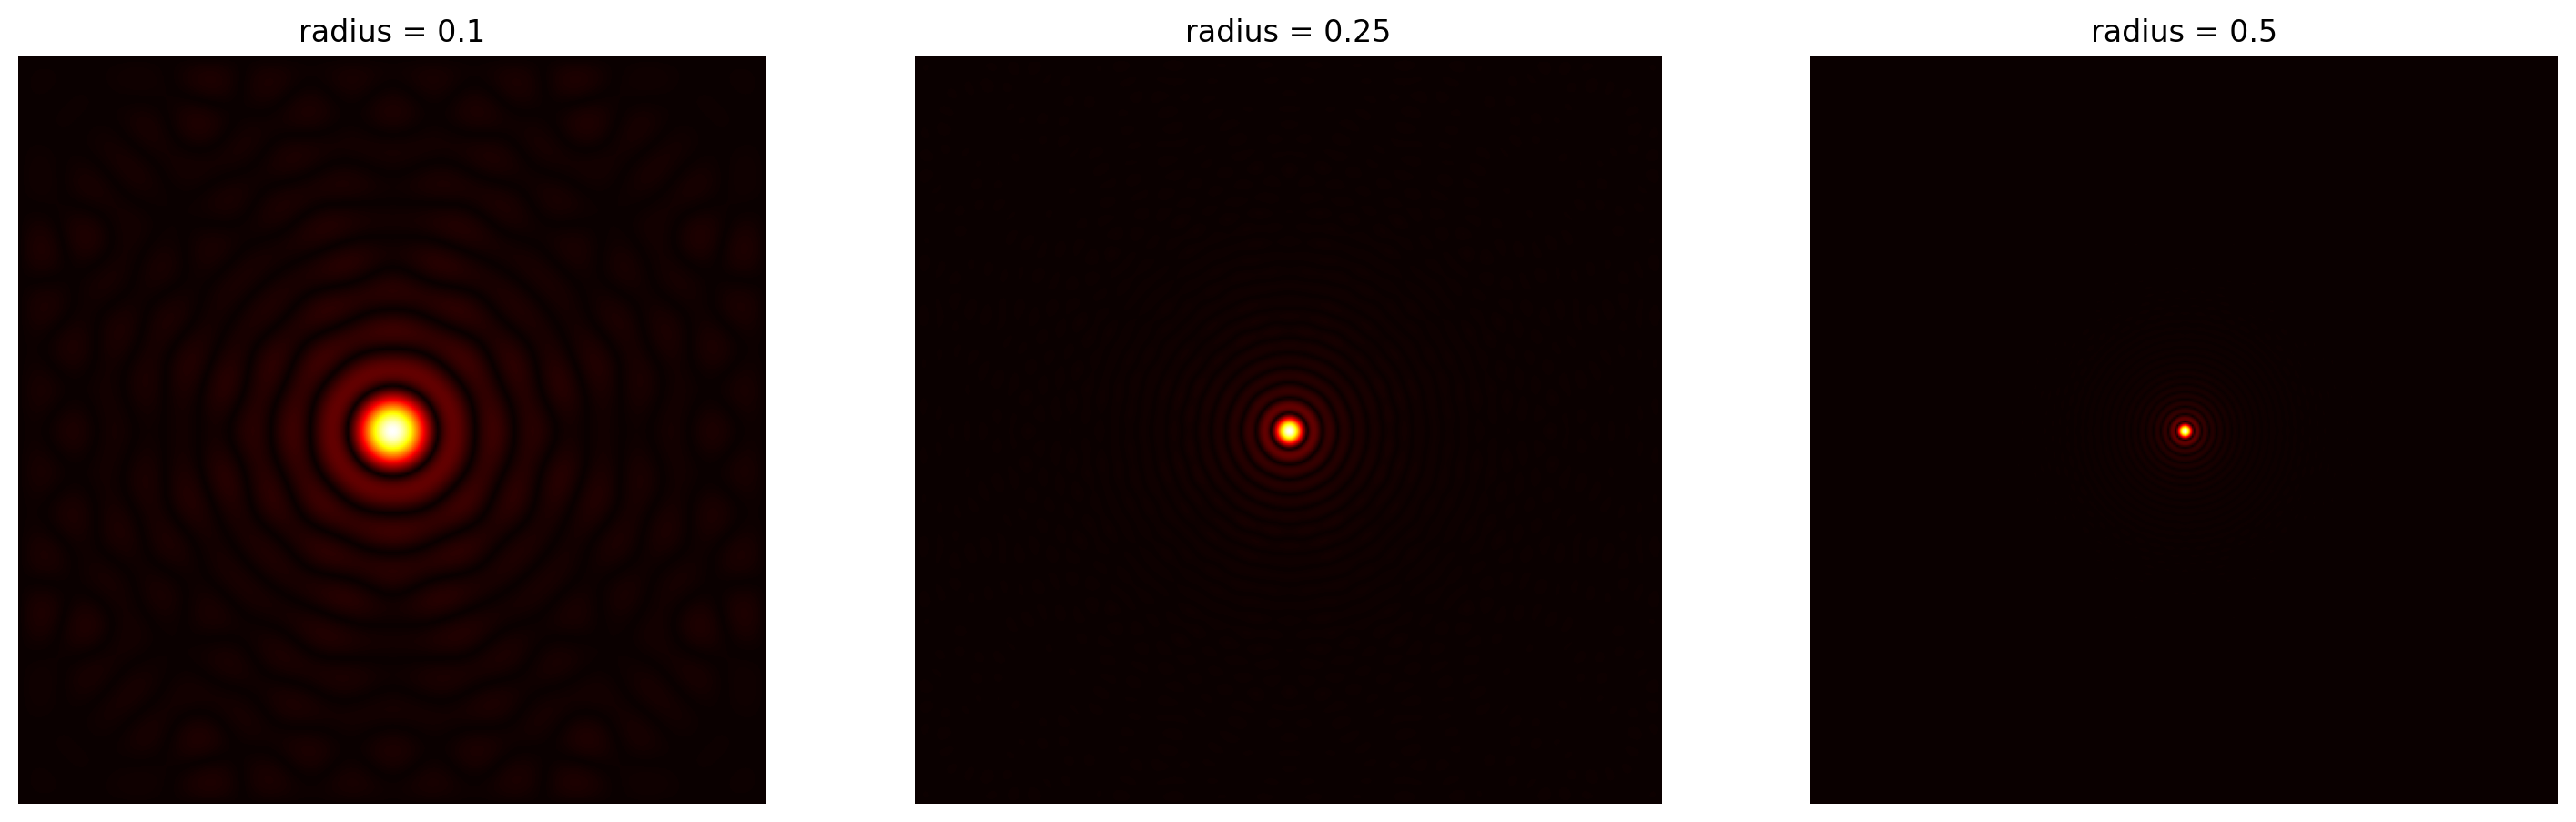

In [123]:
# Next, we display their FT patterns similar to how we did the very first circle with radius = 0.1
# FT of the circle with radius = 0.25
circft_2 = np.fft.fft2(A2)
circft2 = np.fft.fftshift(circft_2)

# FT of the circle with radius = 0.50
circft_3 = np.fft.fft2(A3)
circft3 = np.fft.fftshift(circft_3)

# Plotting parameters
plt.figure(figsize = [18,6])

# 1st subplot for radius = 0.10
plt.subplot(131)
plt.title("radius = 0.1")
plt.axis('off')
plt.imshow((abs(circft1)), cmap = 'hot')

# 2nd subplot for radius = 0.25
plt.subplot(132)
plt.title("radius = 0.25")
plt.axis('off')
plt.imshow((abs(circft2)), cmap = 'hot')

# 3rd subplot for radius = 0.50
plt.subplot(133)
plt.title("radius = 0.5")
plt.axis('off')
plt.imshow((abs(circft3)), cmap = 'hot')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/circles_FT.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

**As we can see from above, as the radius of the circle increases, the resulting FT pattern decreases in size.**

## **Annulus**

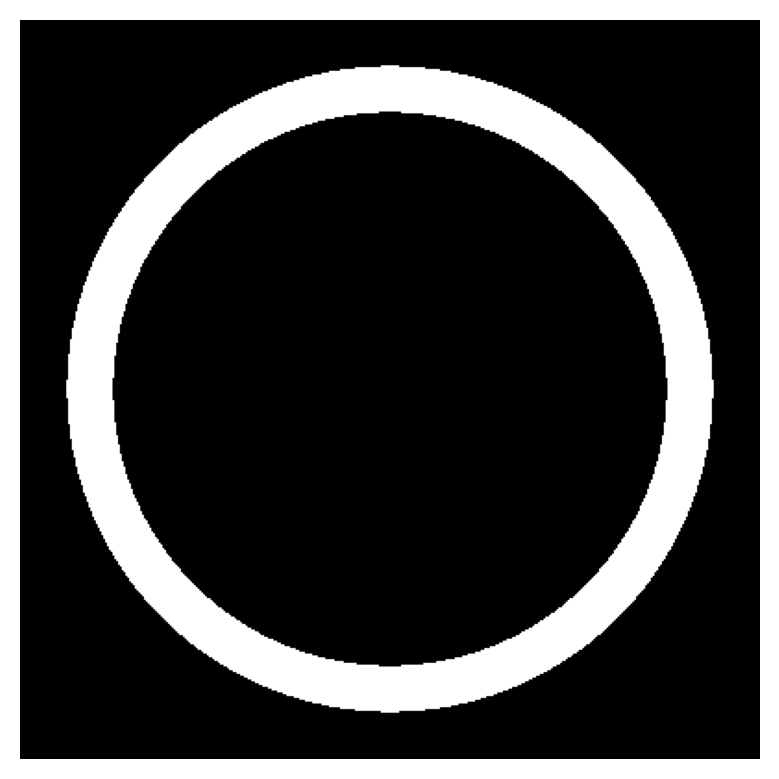

In [30]:
# We reuse the same algorithm for creating an annulus from the previous activity
# I will not explain the code line by line anymore to save time
N = 400                           
x = np.linspace(-2,2,N)
y = x
x,y = np.meshgrid(x,y)
A4 = np.zeros(np.shape(x))

R = np.sqrt(x**2 + y**2)
for m in range(N):
  for n in range(N):
    if R[m,n]>1.5 and R[m,n]<1.75:
      A4[m,n] = 1.0
    else:
      A4[m,n] = 0.0

# Plot
plt.axis('off')
plt.imshow(A4, cmap = "gray")

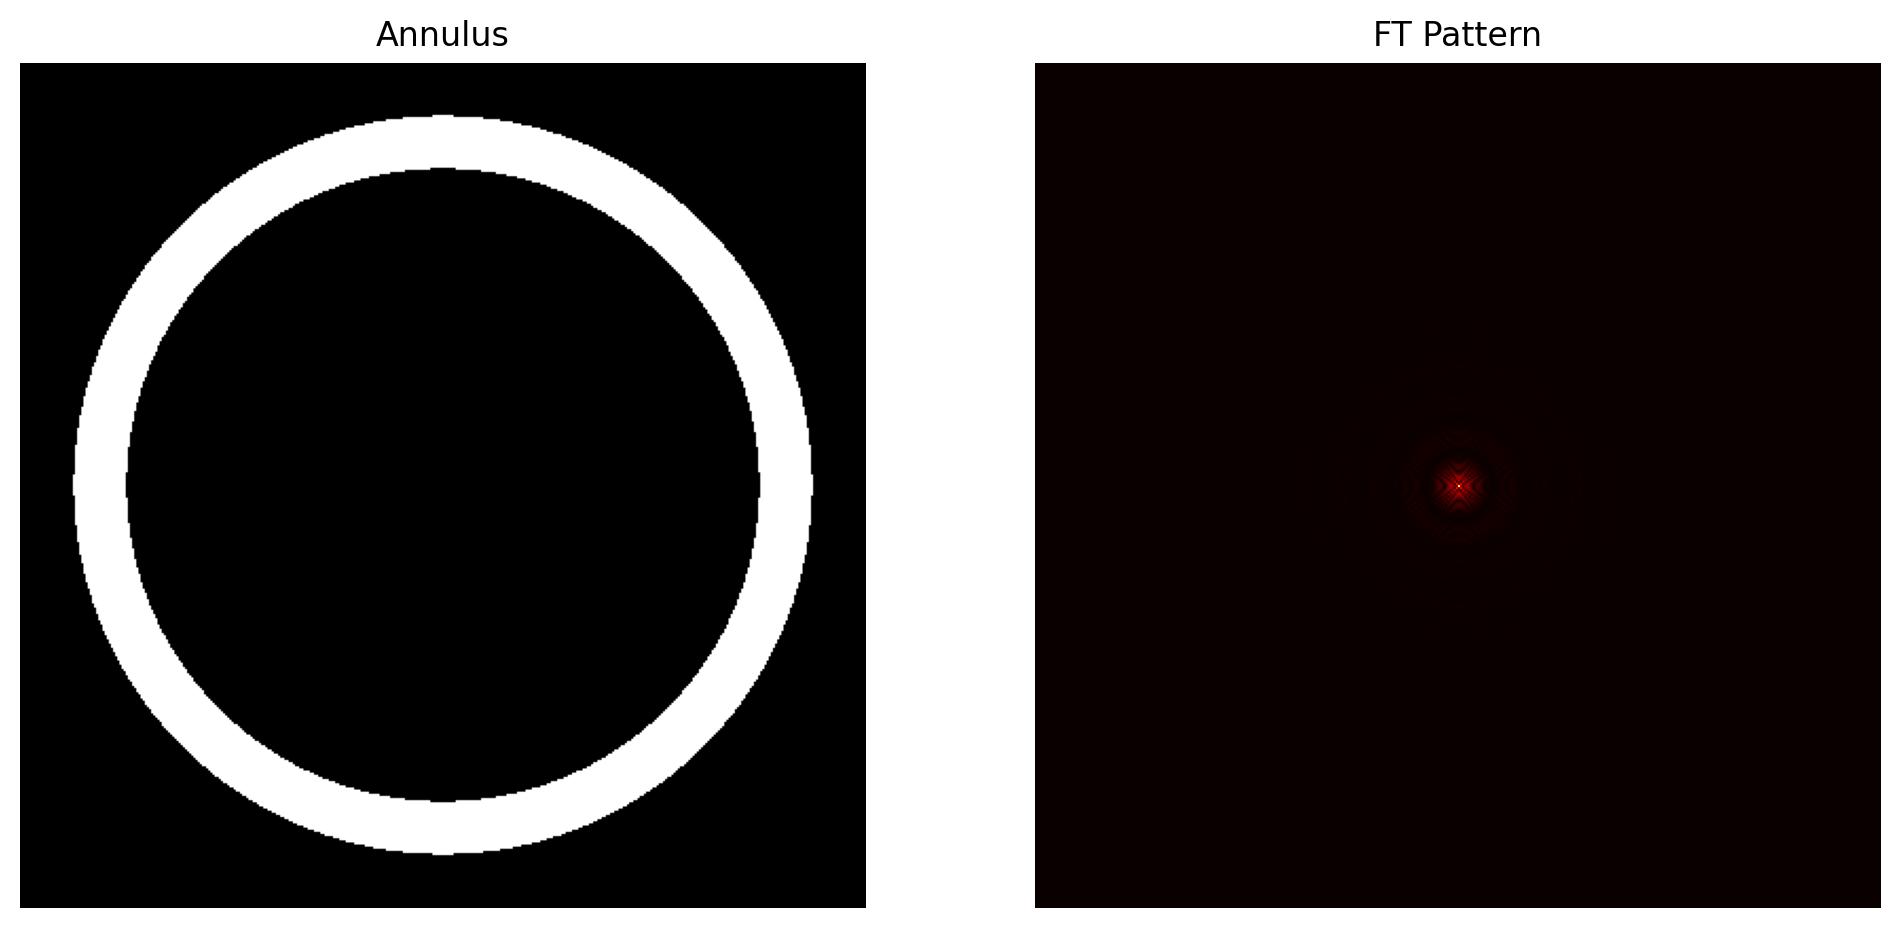

In [122]:
# Taking the FT of the annulus
annulus = np.fft.fft2(A4)
annulusft = np.fft.fftshift(annulus)

# Plot parameters
plt.figure(figsize = [12,6])

# 1st subplot for the annulus
plt.subplot(121)
plt.title("Annulus")
plt.axis('off')
plt.imshow(A4, cmap = 'gray')

# 2nd subplot for the FT pattern
plt.subplot(122)
plt.title("FT Pattern")
plt.axis('off')
plt.imshow((abs(annulusft)), cmap = 'hot')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/annulus_FT.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

## **Sine Wave**

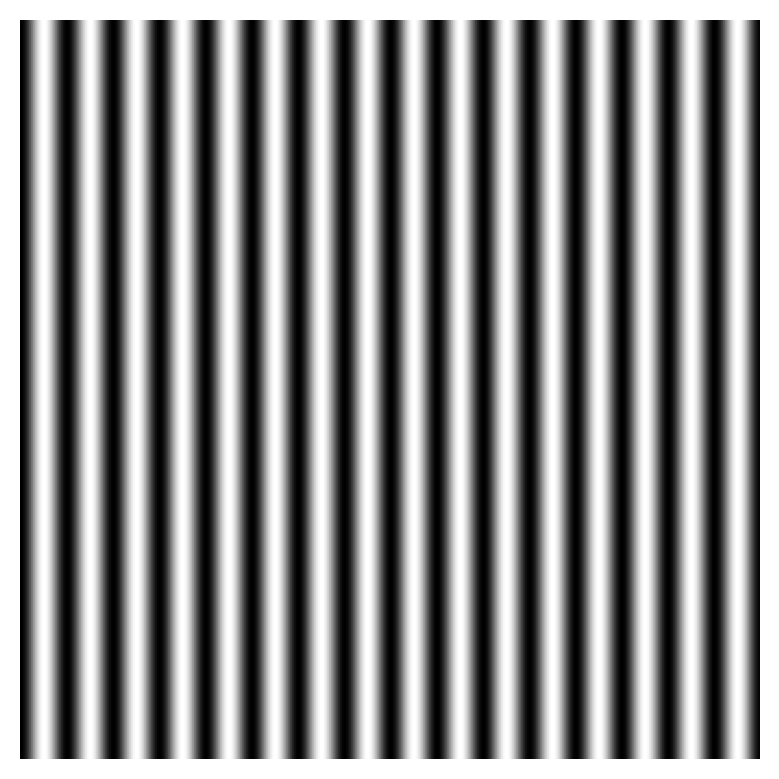

In [34]:
# Reuse the same sine wave formula from the last activity
N = 400                     # set pixels [400x400]
f = 4                       # frequency [4 cycles/cm]
x = linspace(-2,2,N)        # (-2,2) bounds with 200 evenly spaced points
y = x                       # x is the same as y (4x4 image)
x,y = meshgrid(x,y)         # create a grid of rectangular arrays
A5 = zeros(shape(x))        # initialize amplitude array which is just the z values for 3d plotting

# Solve for the values in the amplitude array
for i in range(N):
  A5[:,i] = 2*(((sin(4*pi*f*i/N))**2) - 0.5)   # sine formula with centered amplitude at z = 0

# Plot the sinusoidal wave in 2D
plt.axis('off')
plt.imshow(A5, cmap = "gray")

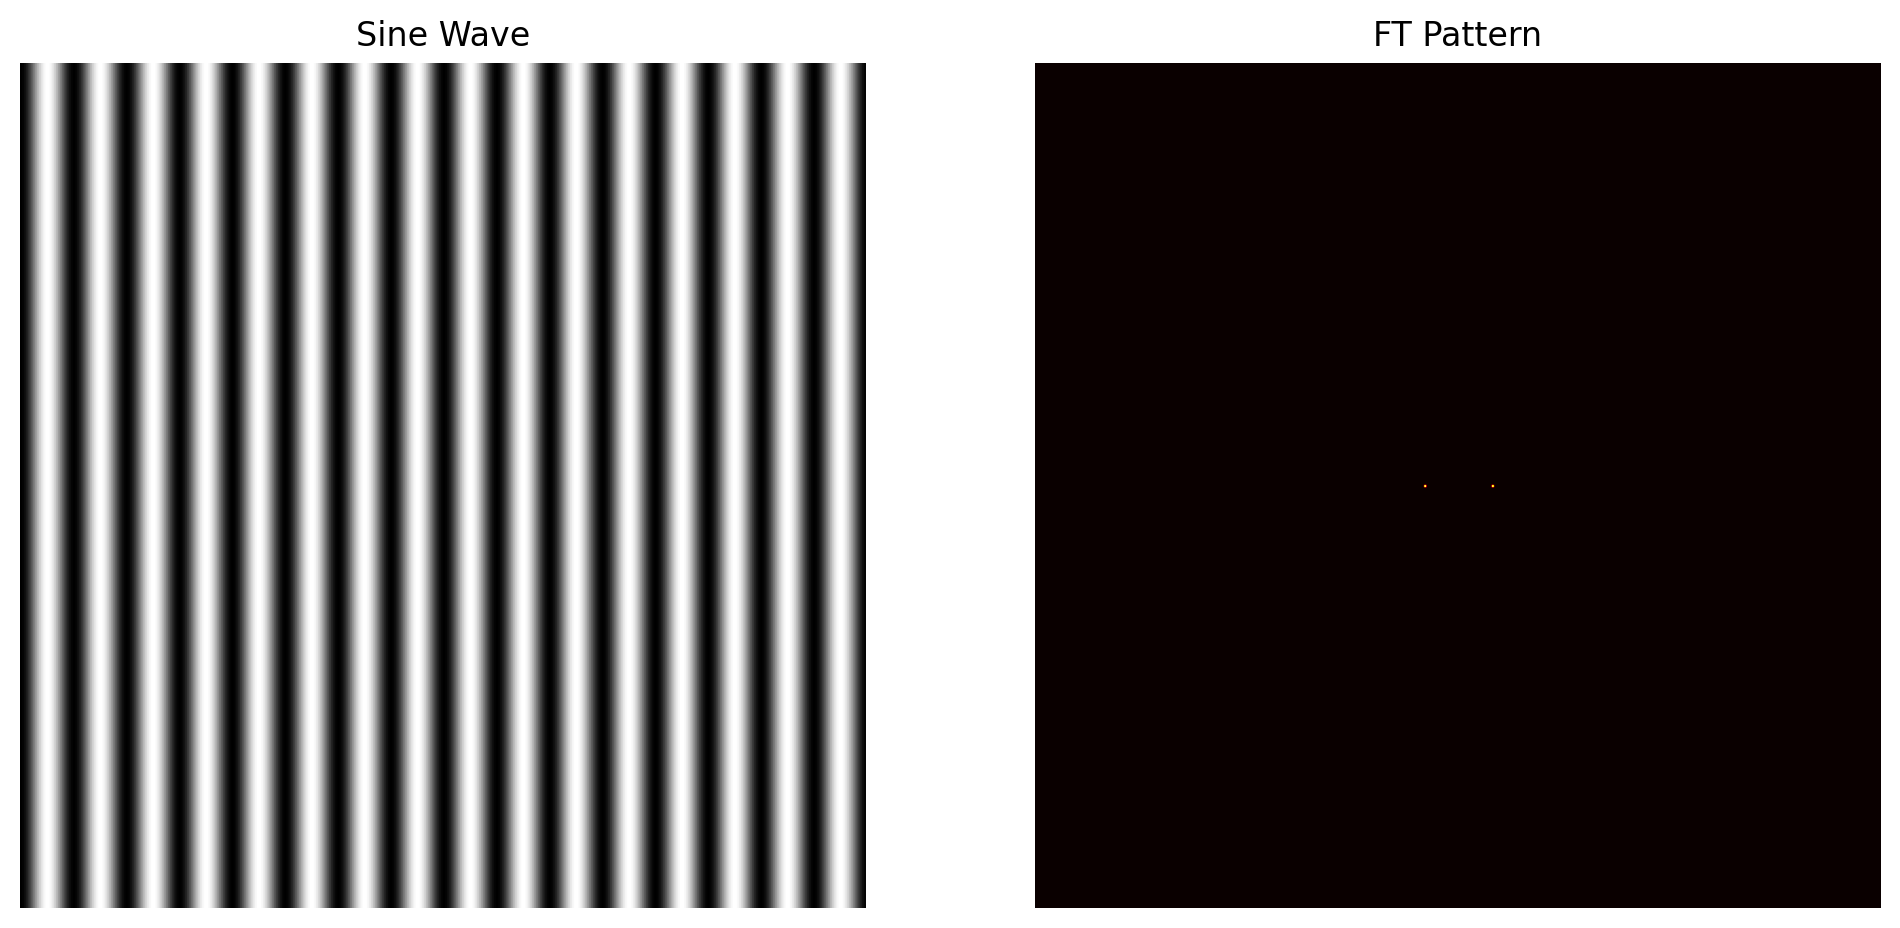

In [120]:
# Taking the FT of the sine wave
sine = np.fft.fft2(A5)
sineft = np.fft.fftshift(sine)

# Plot parameters
plt.figure(figsize = [12,6])

# 1st subplot for the sine wave
plt.subplot(121)
plt.title("Sine Wave")
plt.axis('off')
plt.imshow(A5, cmap = 'gray')

# 2nd subplot for the FT pattern
plt.subplot(122)
plt.title("FT Pattern")
plt.axis('off')
plt.imshow((abs(sineft)), cmap = 'hot')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/sine_FT.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

## **Square Wave**

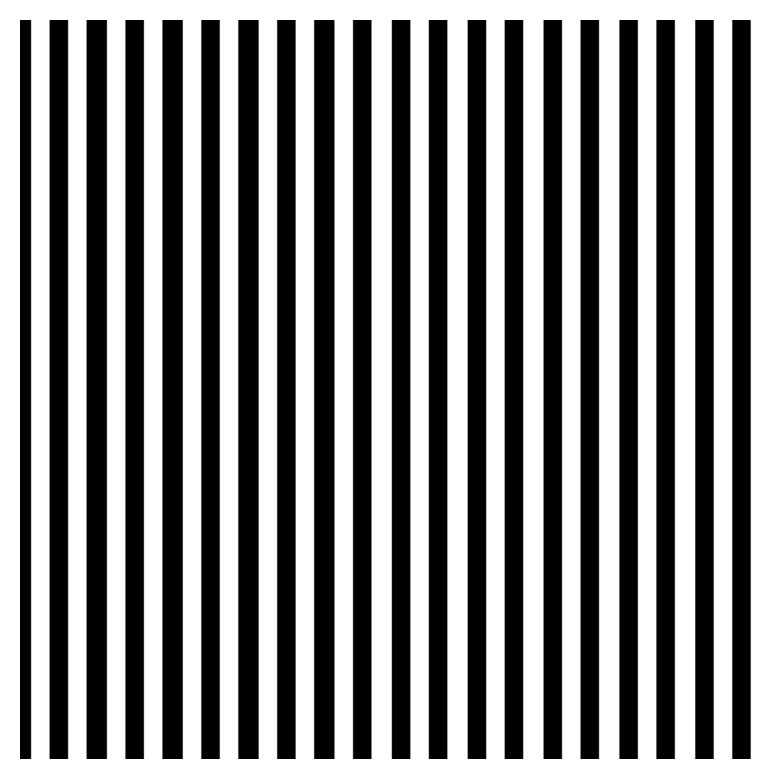

In [36]:
# We reuse the same algorithm to construct a square wave from the previous activity
N = 400                     # set pixels [400x400]
f = 5                       # frequency [5 line pairs/cm]
x = linspace(-2,2,N)        # bounds with 400 evenly spaced points
y = x                       # x is the same as y (4x4 image)
x,y = meshgrid(x,y)         # create a grid of rectangular arrays
A6 = zeros(shape(x))        # initialize array which is just the amplitude values

# Solve for the values in the amplitude array
for i in range(N):
  A6[:,i] = round((sin(3.9*pi*f*i/N))**2)

# Plot the sinusoidal wave (now resembling a square wave) in 2D
plt.axis('off')
plt.imshow(A6, cmap = "gray")

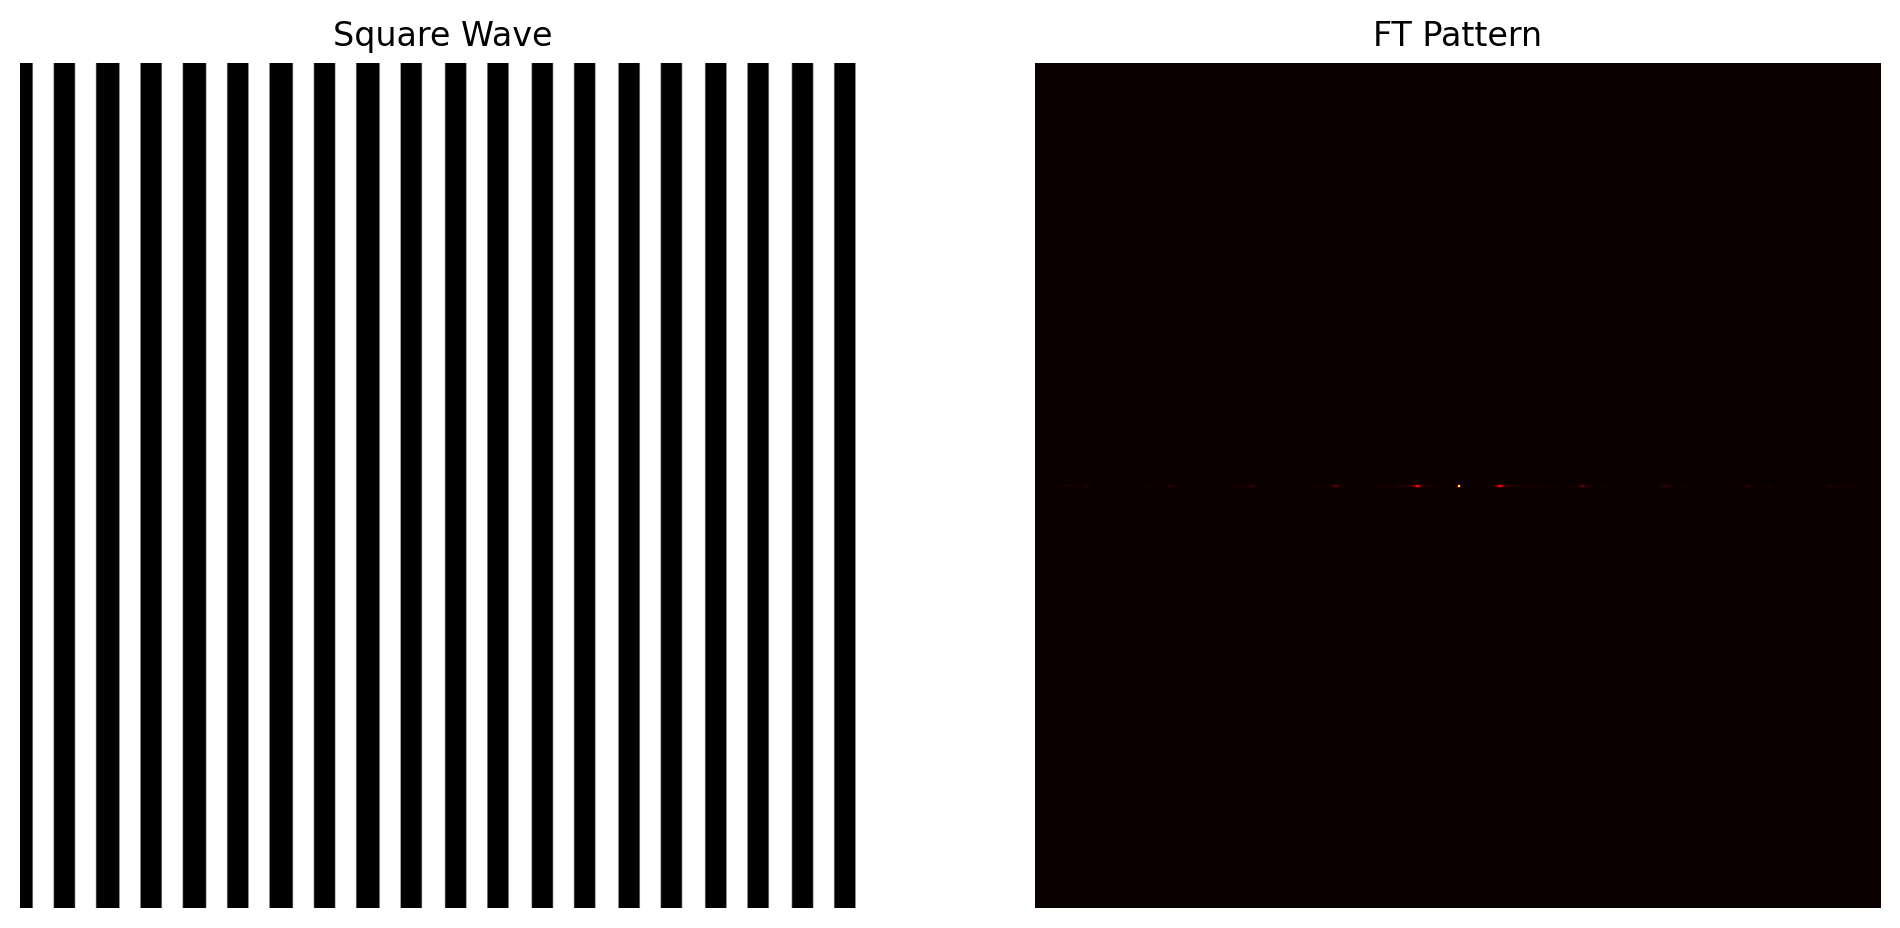

In [119]:
# Taking the FT of the square wave
square = np.fft.fft2(A6)
squareft = np.fft.fftshift(square)

# Plot parameters
plt.figure(figsize = [12,6])

# 1st subplot for the square wave
plt.subplot(121)
plt.title("Square Wave")
plt.axis('off')
plt.imshow(A6, cmap = 'gray')

# 2nd subplot for the FT pattern
plt.subplot(122)
plt.title("FT Pattern")
plt.axis('off')
plt.imshow((abs(squareft)), cmap = 'hot')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/square_FT.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

## **Inverse fft2**

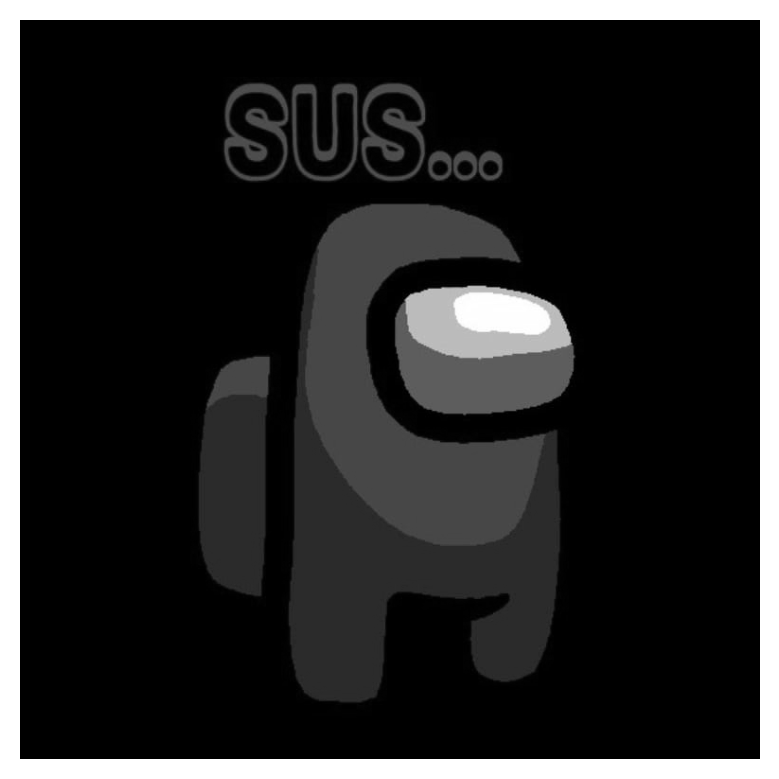

In [43]:
# Load in a square image
Img1 = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/Gimp Files/amorgos.tif')

# Convert to grayscale
grayscale = dot(Img1[...,:3], [0.2989, 0.5870, 0.1140])

# Plot
plt.axis('off')
plt.imshow(grayscale, cmap='gray')
plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/amogus_orig.png', dpi=300, bbox_inches='tight', transparent=True)

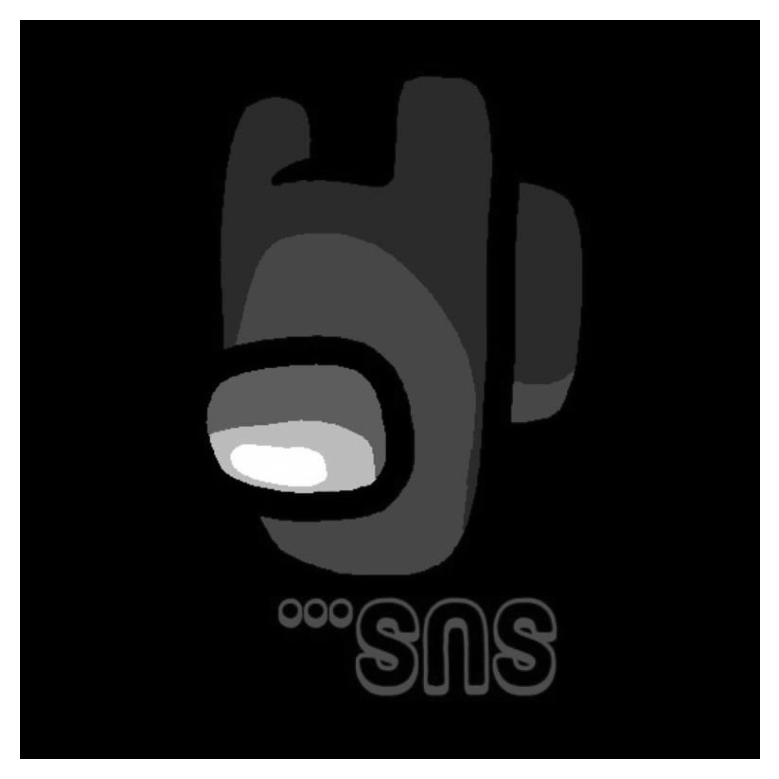

In [44]:
# Apply the fft2 twice on the grayscale image
amogus = np.fft.fft2(fft.fft2(grayscale))

# Plotting the absolute value
plt.axis('off')
plt.imshow((abs(amogus)), cmap = 'gray')
plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/amogus_fft2_twice.png', dpi=300, bbox_inches='tight', transparent=True)

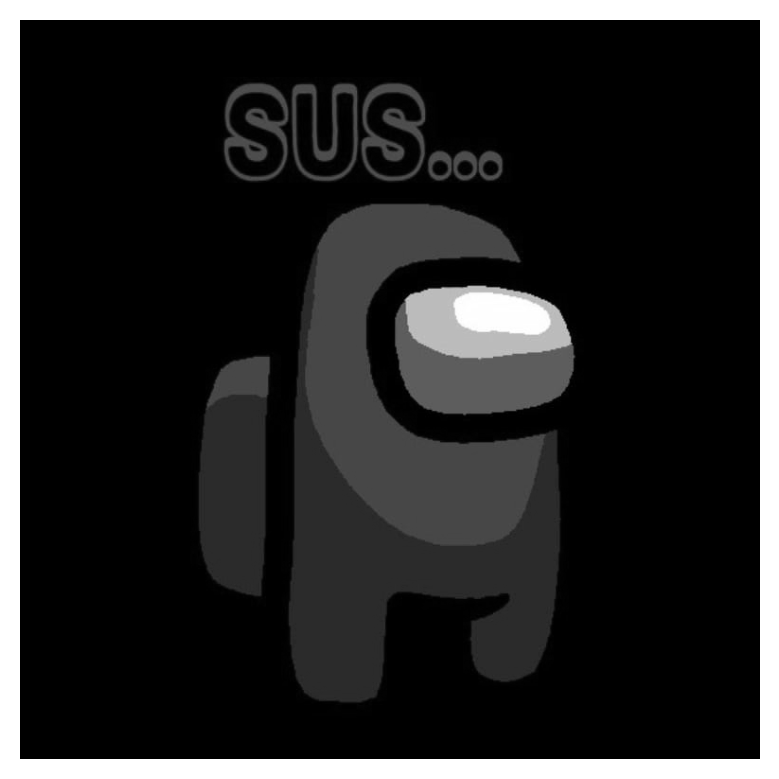

In [45]:
# Taking the inverse fft2 of the fft2 of the grayscale image
amogus_inv = np.fft.ifft2(fft.fft2(grayscale))

# Plotting the absolute value
plt.axis('off')
plt.imshow((abs(amogus_inv)), cmap = 'gray')
plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/amogus_inversefft2.png', dpi=300, bbox_inches='tight', transparent=True)

# **ACTIVITY 2.2: SIMULATION OF AN IMAGING SYSTEM**

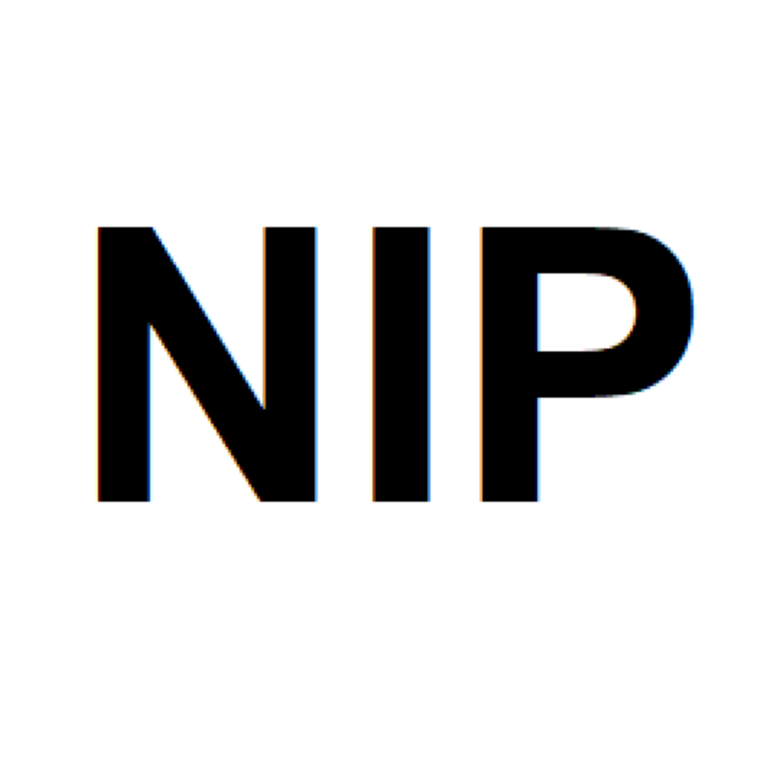

In [62]:
# Load in an image of NIP
Img2 = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/NIP.tif')
# Take the fft2 of the image for later use
nip = np.fft.fft2(Img2[:,:,1]) 

# Plot the image in gray cmap
plt.axis('off')
plt.imshow(Img2,cmap ='gray')

In [63]:
# Load in the images of the circular apertures acting as lenses 
# We maintain a linearly increasing value for the radius sizes
lens1 = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/circle10.tif')
lens2 = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/circle25.tif')
lens3 = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/circle50.tif')
lens4 = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/circle75.tif')
lens5 = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/circle100.tif')

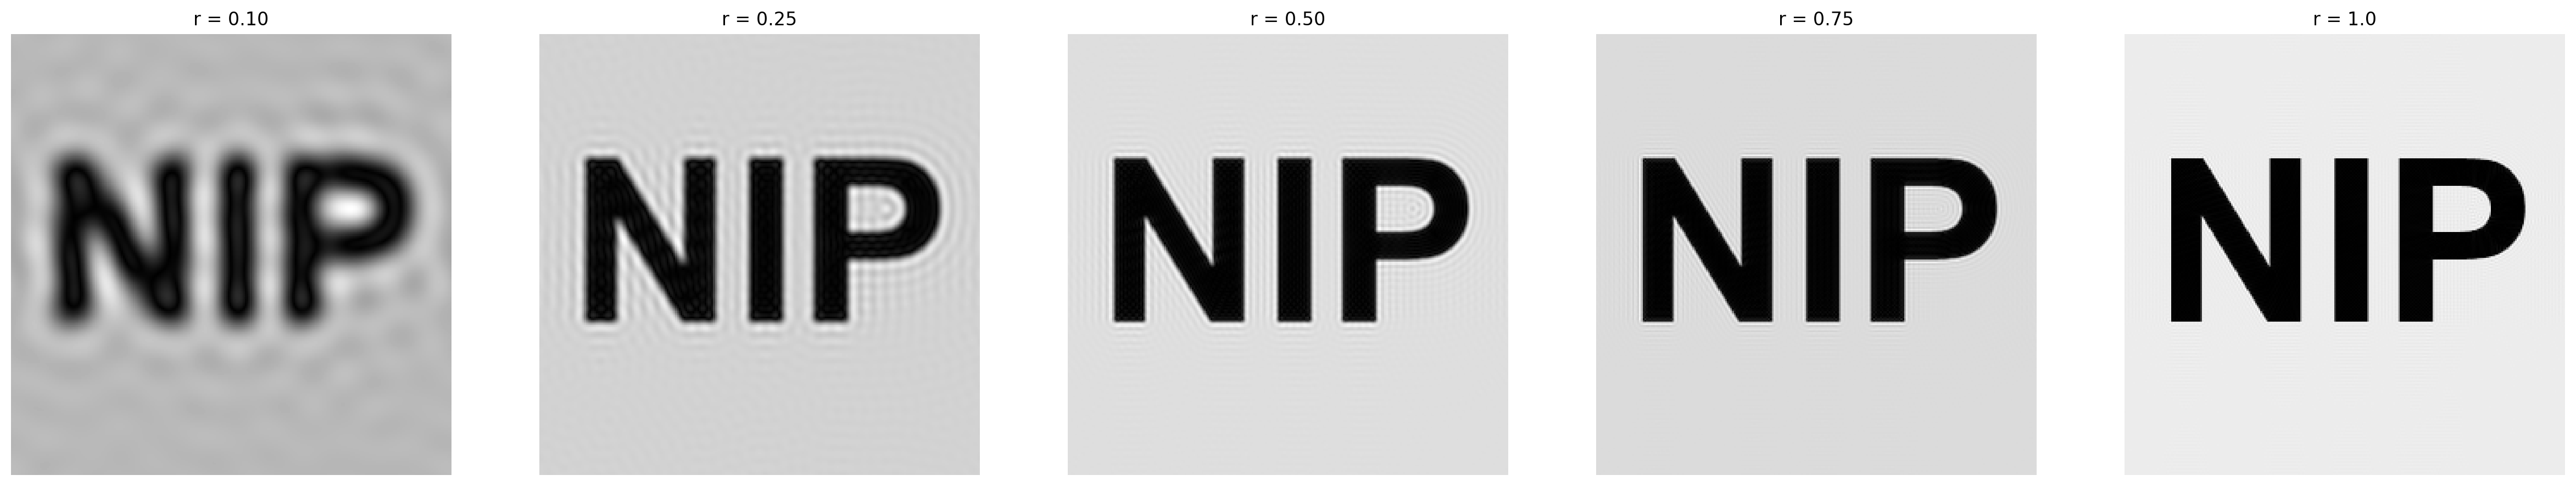

In [94]:
# Store the lens values into an array (256, 256, 1)
lenses = np.array([lens1[:,:,1], lens2[:,:,1], lens3[:,:,1], lens4[:,:,1], lens5[:,:,1]])

# Initialize list
I = []

# Create a for loop for the convolution algorithm
for i in lenses:                     # loops through each element in lenses array
    lens = np.fft.fftshift(i)        # fftshift each lens
    convol = lens*nip                # convolve each iteration of the fftshifted lens with the fft2'd nip
    result = np.fft.ifft2(convol)    # take the inverse fft2 of the product
    I.append(result)                 # append each iteration to the list
    

# Plot parameters
plt.figure(figsize = [30,6])

# 1st subplot for r = 0.1
plt.subplot(151)
plt.title("r = 0.10")
plt.axis('off')
plt.imshow(abs(I[0]), cmap='gray')

# 2nd subplot for r = 0.25
plt.subplot(152)
plt.title("r = 0.25")
plt.axis('off')
plt.imshow(abs(I[1]), cmap = 'gray')

# 3rd subplot for r = 0.50
plt.subplot(153)
plt.title("r = 0.50")
plt.axis('off')
plt.imshow(abs(I[2]), cmap='gray')

# 4th subplot for r = 0.75
plt.subplot(154)
plt.title("r = 0.75")
plt.axis('off')
plt.imshow(abs(I[3]), cmap = 'gray')

# 5th subplot for r = 1.0
plt.subplot(155)
plt.title("r = 1.0")
plt.axis('off')
plt.imshow(abs(I[4]), cmap='gray')


#plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/annulus_FT.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

**As the aperture size increases, the brighter and sharper the resulting convolved image becomes.**

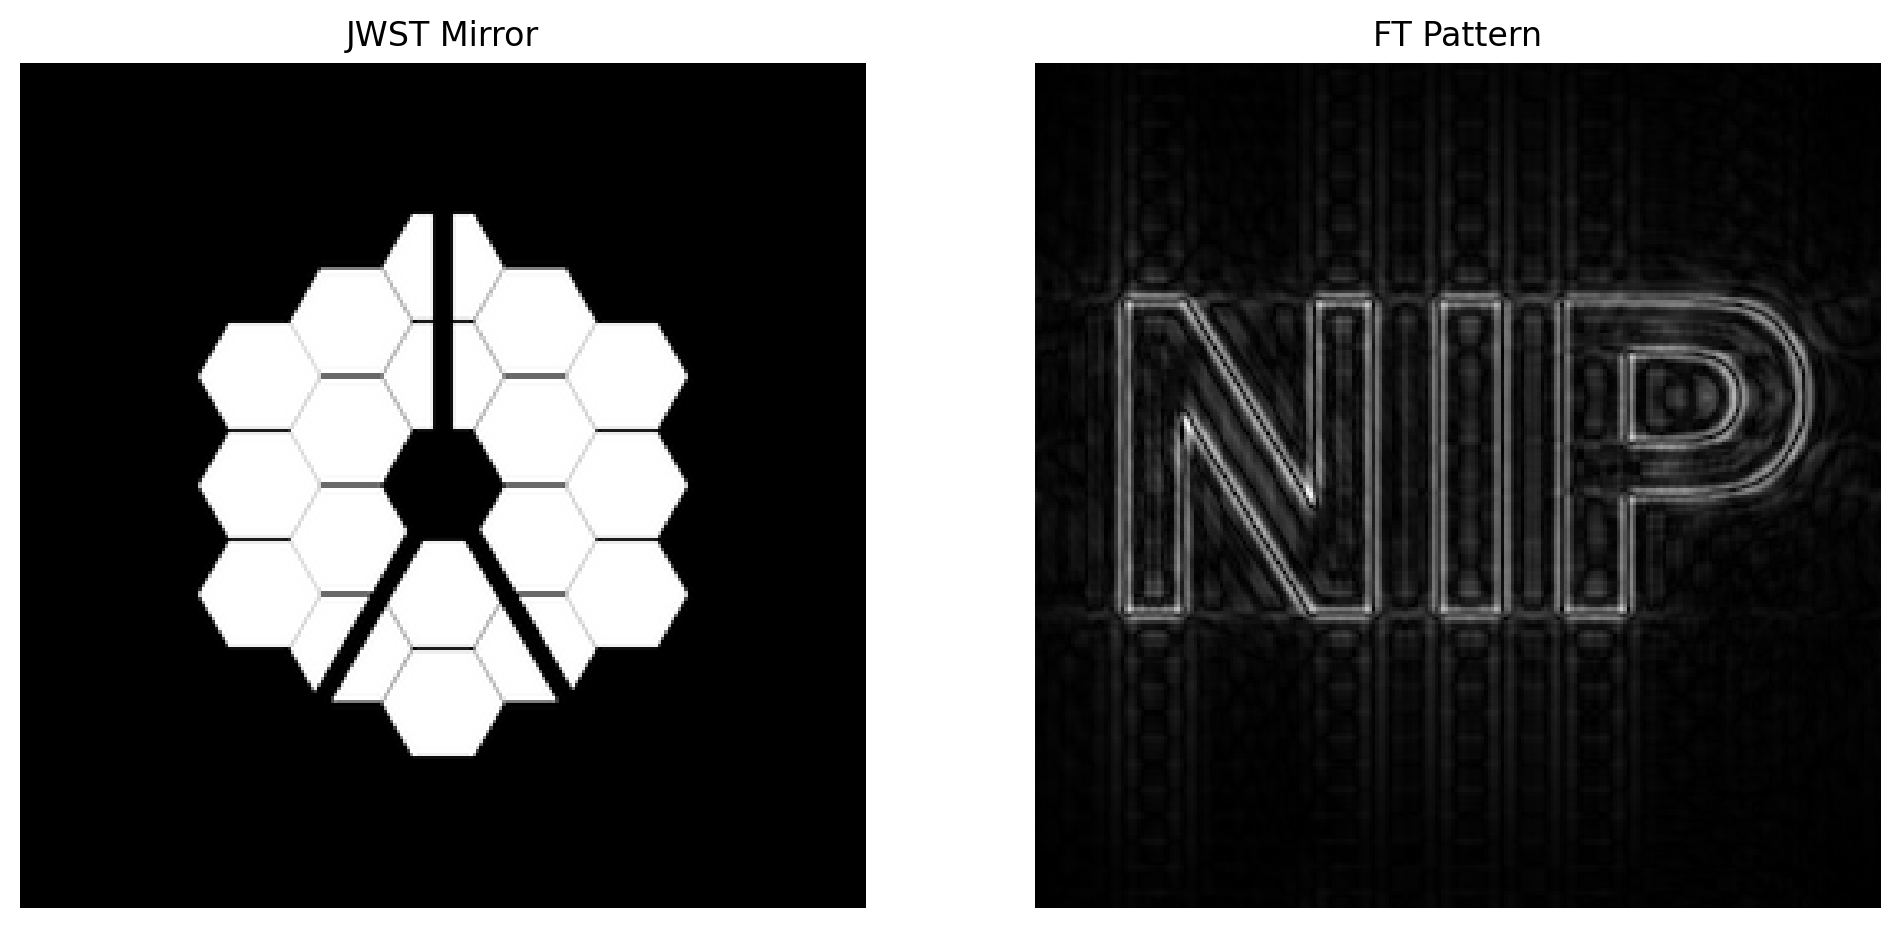

In [127]:
# Convolving the jwst mirror with NIP image
# Load the previously constructed jwst image from activity 1
load = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/JWST2.tif')
jwst = dot(load[...,:3], [0.2989, 0.5870, 0.1140])

# Same algorithm as the for loop above
lens = np.fft.fftshift(jwst) 
convol = lens*nip
result = np.fft.ifft2(convol) 

# Plot parameters
plt.figure(figsize = [12,6])

# 1st subplot for the square wave
plt.subplot(121)
plt.title("JWST Mirror")
plt.axis('off')
plt.imshow(jwst, cmap = 'gray')

# 2nd subplot for the FT pattern
plt.subplot(122)
plt.title("FT Pattern")
plt.axis('off')
plt.imshow(abs(result), cmap='gray')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/NIP_jwst.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

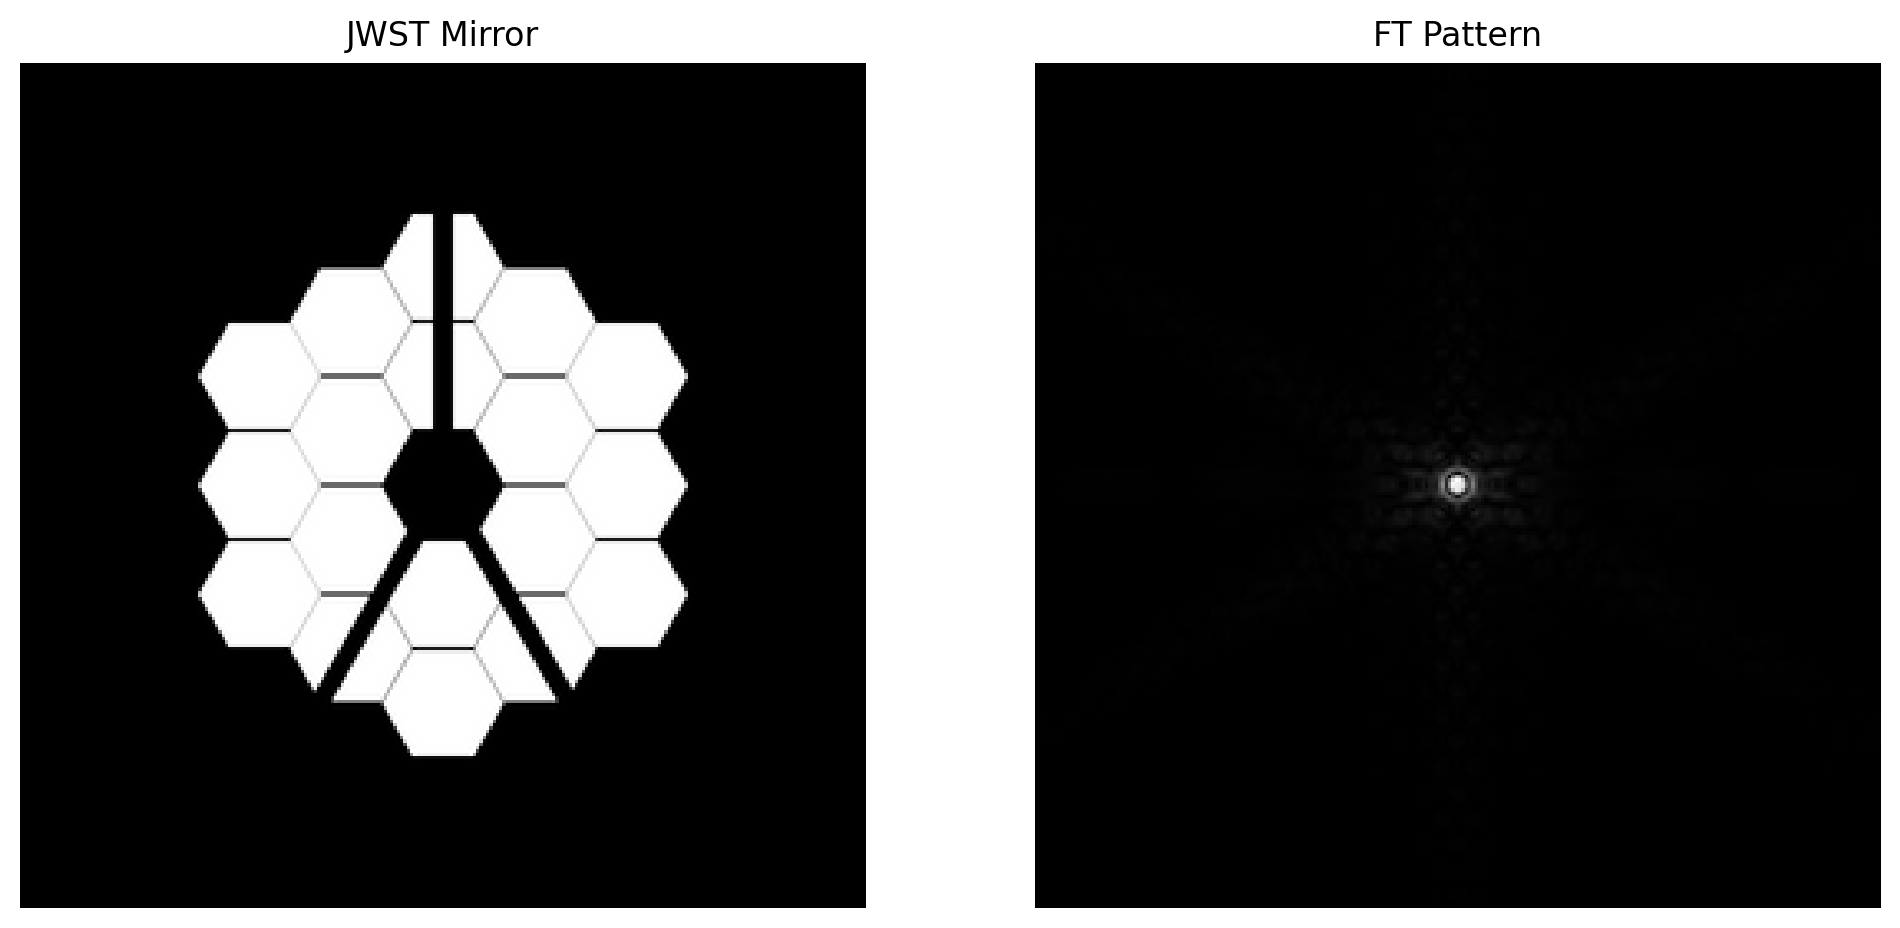

In [129]:
# Convolving the jwst mirror with a small circle
# The small circle approximates a bright dot in space or essentially a star
new_circle = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/trycirc1.png')
star = np.fft.fft2(new_circle[:,:,1]) 

# Same algorithm as the for loop above
lens = np.fft.fftshift(jwst) 
convol = lens*star
result = np.fft.ifft2(convol)

# Plot parameters
plt.figure(figsize = [12,6])

# 1st subplot for the square wave
plt.subplot(121)
plt.title("JWST Mirror")
plt.axis('off')
plt.imshow(jwst, cmap = 'gray')

# 2nd subplot for the FT pattern
plt.subplot(122)
plt.title("FT Pattern")
plt.axis('off')
plt.imshow(abs(result), cmap='gray')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/star_jwst.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

**As we can see from above, this is is approximately how the JWST mirror reconstructs a star into an image.**

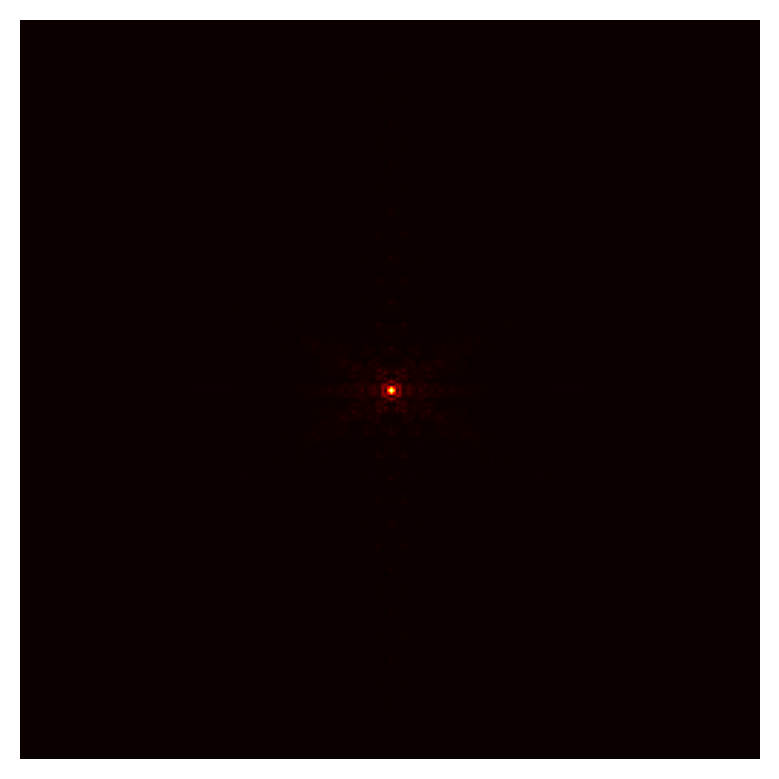

In [131]:
# Visualizing the FT pattern of the JWST mirror
jwst_fft2 = np.fft.fft2(jwst)
jwstft = np.fft.fftshift(jwst_fft2)
plt.axis('off')
plt.imshow((abs(jwstft)), cmap = 'hot')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/jwst_ft.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# **ACTIVITY 2.3: TEMPLATE MATCHING USING CORRELATION**

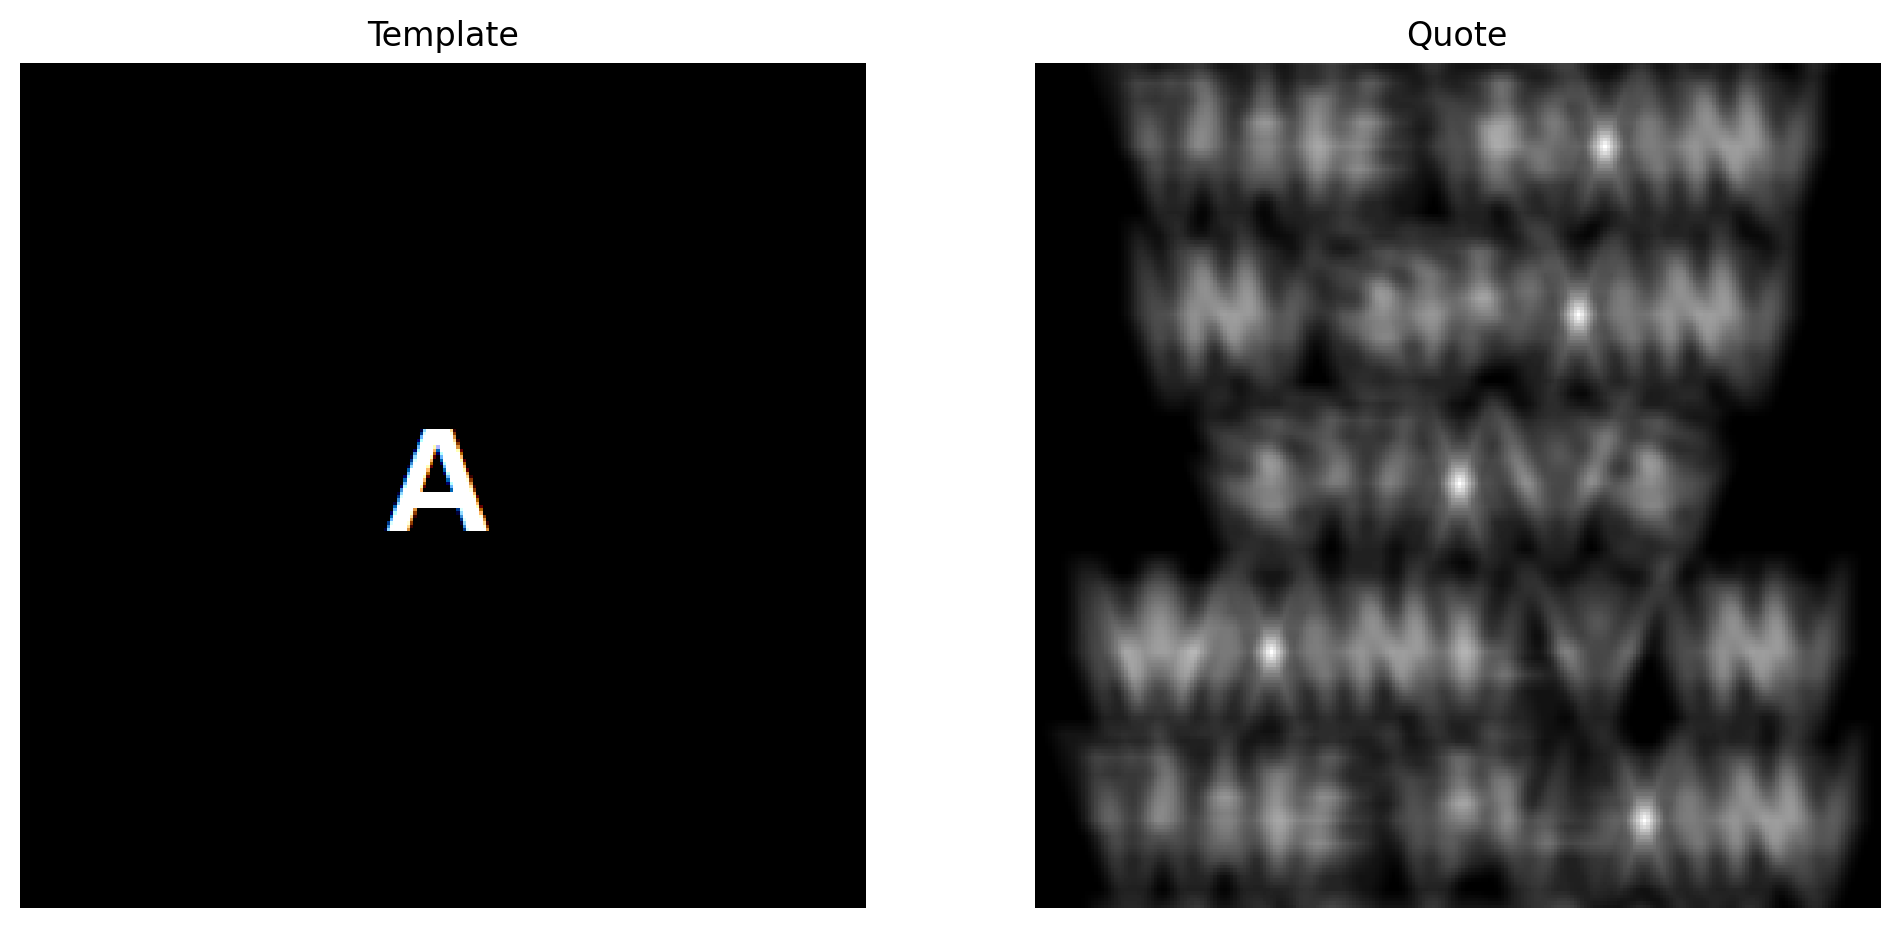

In [142]:
# Loading the quote and the template
quote = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/spainquote.tif')
template = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/A.tif')

# Taking the fft2 of both
quote_ft = np.fft.fft2(quote[:,:,1])
A_ft = np.fft.fft2(template[:,:,1])

# Convolving the complex conjugate of the quote with the template
convol = (np.conj(A_ft))*quote_ft

# Taking the inverse fft2 of the convolution
result = np.fft.ifft2(convol)

# Plot parameters
plt.figure(figsize = [12,6])

# 1st subplot for the A template
plt.subplot(121)
plt.title("Template")
plt.axis('off')
plt.imshow(template, cmap = 'gray')

# 2nd subplot for the resulting quote
plt.subplot(122)
plt.title("Quote")
plt.axis('off')
plt.imshow(abs(np.fft.fftshift(result)), cmap='gray')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/A_quote.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

**Template correlation matched 5 high intensity points which denotes that a pattern of "A" is found at that spot.**

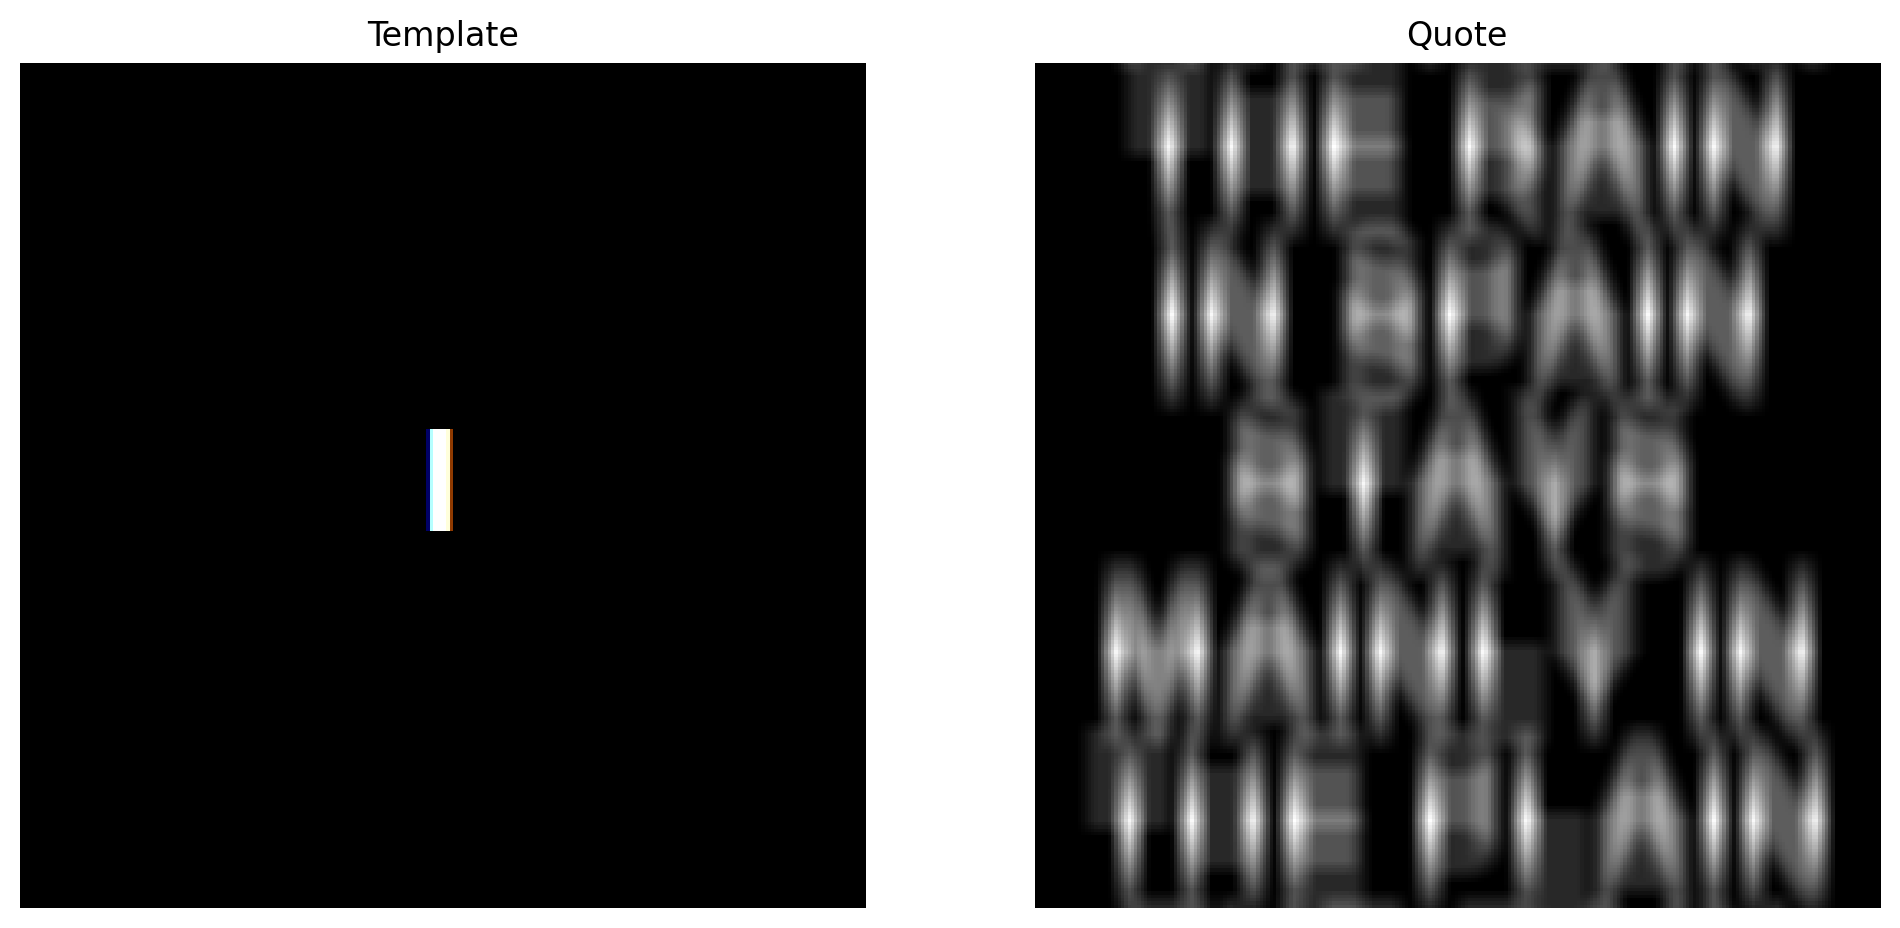

In [145]:
# Loading the new I template
template = plt.imread('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/I.tif')

# Taking its fft2
I_ft = np.fft.fft2(template[:,:,1])

# Convolving
convol = (np.conj(I_ft))*quote_ft

# Taking the fft2 of the convolution
result = np.fft.ifft2(convol)

# Plot parameters
plt.figure(figsize = [12,6])

# 1st subplot for the I template
plt.subplot(121)
plt.title("Template")
plt.axis('off')
plt.imshow(template, cmap = 'gray')

# 2nd subplot for the resulting quote
plt.subplot(122)
plt.title("Quote")
plt.axis('off')
plt.imshow(abs(np.fft.fftshift(result)), cmap='gray')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT2new/I_quote.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

**Template correlation matched 34 high intensity points which denotes that a pattern of "I" is found at that spot.**